# Data Science Virtual Internship Program at LetsGrowMore
# Task: Iris Flower Classification Machine Learning Project
# Name: Samiksha Sunil Nand


# 

# Importing the required library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading The Dataset

In [2]:
dataset = pd.read_csv("iris.data", names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Target'])
dataset

,Sepal Length,Sepal Width,Petal Length,Petal Width,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis

In [3]:
dataset.head()
# shows the first five rows of the data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.shape

(150, 5)

In [5]:
dataset.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dataset['Target'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Target, dtype: int64

# Processing Data

In [8]:
dataset.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Target          0
dtype: int64

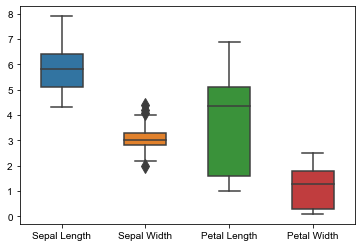

In [9]:
sns.boxplot(data = dataset, width = 0.5, fliersize = 10)
sns.set(rc = {"figure.figsize" : (6,6)})

<AxesSubplot:>

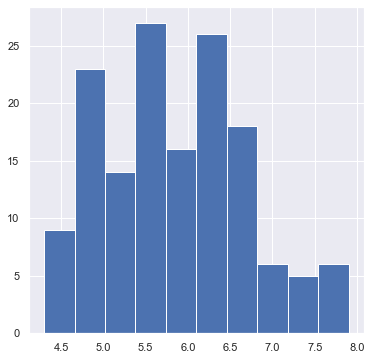

In [10]:
dataset['Sepal Length'].hist()

<AxesSubplot:>

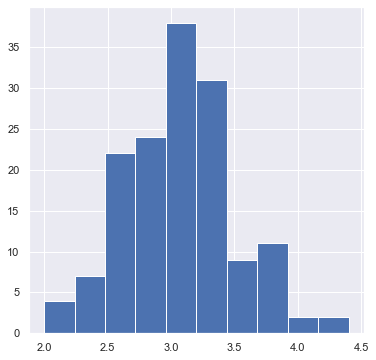

In [11]:
dataset['Sepal Width'].hist()

<AxesSubplot:>

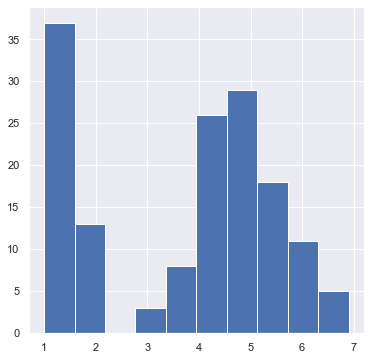

In [12]:
dataset['Petal Length'].hist()

<AxesSubplot:>

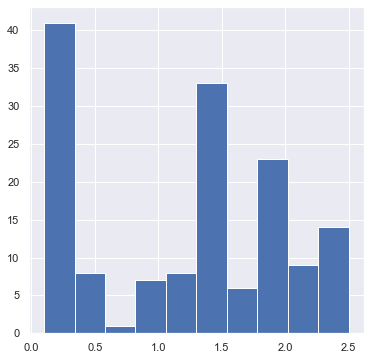

In [13]:
dataset['Petal Width'].hist()

# Model Training

In [14]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 4].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [18]:
Y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [21]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [22]:
print("Accuracy: ",classifier.score(X_test, Y_test) * 100)

Accuracy:  100.0
